<h2 text-align="center">Time Series Problems and Challenges<h2>

Time Series is a sequence of observations that depend on time.
Time Series analysis involves working with time based data to make forecasrs about the future.
The period is measured in seconds, minutes, hours, days, months, years, or any other time unit.

Even while relying on complex mathematical models for solving time series problems, we should not underestimate the human ability to find patterns and dependencies, therefore, visual representation of time series data is an important part of the analysis.

<h4>Time series analysis</h4>

Time series analysis recognizes the essence of time series data structures and extracts helpful information from time series: trend, cyclic and seasonal deviations, correlations and so on.
It involves the following tasks
<ul>
    <li>Pre-process and perform feature extraction to get a meaningful and valid time series dataset</li>
    <li>Obtain definite insights into the historical time series dataset</li>
    <li>Data representation and visualization (graphical analysis, chart construction, report building)</li>
</ul>

<h4>Time series forecasting</h4>
Time series forecasting includes:
<ul>
    <li>Developing models</li>
    <li>Using them to forecast future predictions</li>
</ul>
Time series analysis is the first step to prepare and analyze time series dataset for time series forecasting.

<h4>Random Walk</h4>
Is a basic and one of the simplest time series models.
A random walk is a sum of independent random variables with normal distribution.
The following recurrence formula can describe the random walk process:
<b>Note: Everything in brackets is subscript</b>
R(t+1)=R(t)+E(t)
where t is the time or sequence of observations about the series have been taken


The random walk is a fundamental stochastic process. It is an integral part of every natural time series. We will see later how each theoretical time series model assumes that it has randomness, which is expressed as an addition of some random variable E(t) to each observation

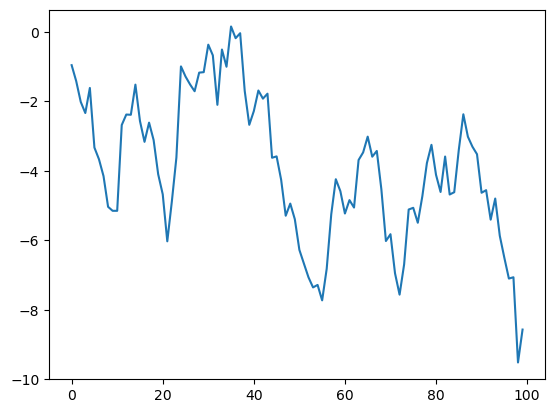

In [6]:
import matplotlib.pyplot as plt
import random

def generate_random_walk(length = 100, mu = 0, sig = 1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i == 0:
            ts.append(e)
        else:
            ts.append(ts[i-1]+e)
    return ts

random.seed(10)
random_walk = generate_random_walk(100)
plt.plot(random_walk)
plt.show()

<h4>Trend</h4>
Trend is the main global time series direction.
A quick way to check the presence of a trend is to plot the time series.
The following formula describes a time series with a linear trend:
<b>Note: Everything in brackets is subscript</b>

T(t) = A + B ...t + E(t)

Let us check how a time series with a linear trend is generated.

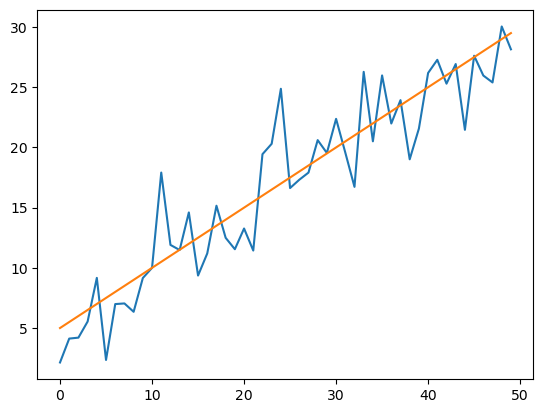

In [7]:
import matplotlib.pyplot as plt
import random

random.seed(10)
length = 50
A = 5
B = .5
C = 3

trend = [A + B * i for i in range(length)]
noise = [C * random.gauss(0, 1) for _ in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

Time series do not often have a linear trend. Often this trend can be non-linear and can be expressed using the following formula:

<b>Note: Everything in brackets is subscript</b>

T(t) = A + F(t) + E(t)
where F(t) is non-linear monotonic function

Below is an example of a non-linear trend

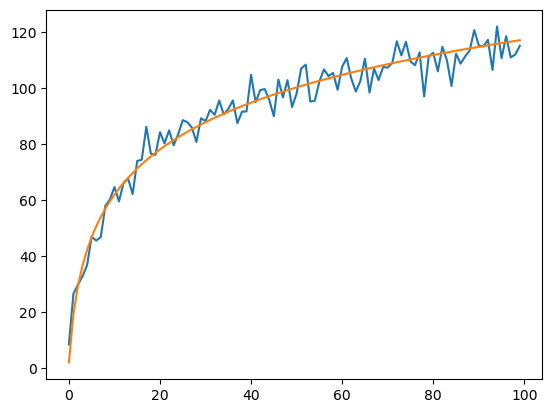

In [8]:
from math import log
import matplotlib.pyplot as plt
import random

random.seed(1)

length = 100
A = 2
B = 25
C = 5

noise = [C * random.gauss(0, 1) for _ in range(length)]
trend = [A + B *log(i) for i in range(1, length + 1)]
ts = [trend[i] + noise[i] for i in range(length)]

plt.plot(ts)
plt.plot(trend)
plt.show()

<h4>Seasonality</h4>
Seasonality is repetitive variations in a time series dataset. Many processes are cyclic by their nature and that is why these processes generate time series with the presence of seasonality.

<b>Note: Everything in brackets is subscript</b>

A periodic function is a function that repeats its values at regular intervals:

S(t+p)=S(t)

The most common mathematical periodic functions are trigonometric functions: sin(x), cos(x).

The formula below describes a time series with seasonality:

T(t) = A + Bt + CS(t) + E(t)

An example of a time series with functionality.

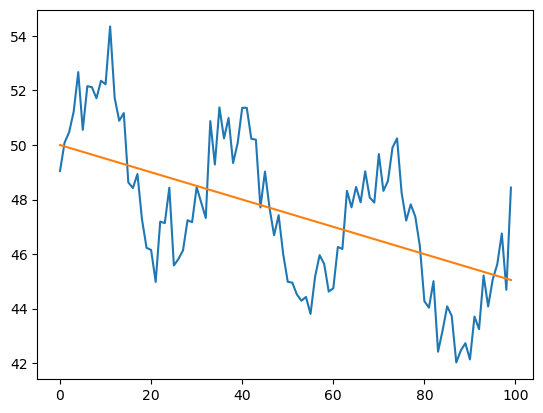

In [12]:
from math import sin
import matplotlib.pyplot as plt
import random

random.seed(10)

length = 100
A = 50
B = -.05
C = 1
S = 3

trend = [A + B * i for i in range(length)]
seasons = [S * sin(i/5) for i in range(length)]
noise = [C * random.gauss(0,1) for _ in range(length)]
ts = [trend[i]  + noise[i] + seasons[i] for i in range(length)]

plt.plot(ts)
plt.plot(trend)
plt.show()

<h4>Stationarity</h4>
A stationary time series is does not depend on the point at which the series is observed. Thus, time series with trends, or seasonality, is not stationary. On the other hand, random walk is stationary. It looks much the same no matter when you observe it. The main rule of thumb is that you cannot make any assumption about the stationary time series in a moment of time.

<h3>Time series common problems</h3>
Globally, time series analysis can be divided into:
<ul>
    <li>Forecasting<p>Tries to find the most likely time series values in the future. Practical applications include: economy, stock trading, medicine. As a rule, the forecasting task does not imply an exact solution but the suggestion of a certain interval in which the time series future values will be located. Because every natural time series has a random component E(t), an it is impossible to predict the future value with 100% probability</p></li>
    <li>Modelling<p>Modelling task implies the construction of a model that would describe a certain process over the observed time series. Examples: finding cycles and subsycles of astronomical objects movements, studying customer preferences</p></li>
    <li>Anomaly detection <p>Is a method used to recognize exceptional patterns that fo not correspond to expected behaviour in time series. Applications: unexpected engine temperature changes, fraud detection(atypical withdrawal activity), heartbeat behaviour shifts</p></li>
</ul>

<h3>Classical approaches</h3>
To measure deep learning models effectiveness, we will need to compare them with  the classical ones.

Below we will introduce some classical techniques to time series and their implementation to the Facebook stock price prediction problem. In further examples, we will try to predict tommorow's close price by analyzing current close prices.

<h4>Autoregressive model (AR)</h4>
The main goal of AR is to find some model of the form:
    
<b>Note: Everything in brackets is subscript</b>
    
T(t) = a(0) + a(1)T(t-1) + a(2)T(t-2) + a(n)T(t-n)
    
which most likely describes a time series. The notation AR(p) means that the autoregressive model uses p history lag to make a prediction.

Let's create AR(2) model for Facebook quotes time series

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import yfinance as yf

quotes = yt.download('FB', start = '2011-1-1', end = '2021-1-1')

model = AutoReg(quotes['Close'], lags = 2)
model_fit = model.fit()

print(model_fit.params)

Result

        Intercept  0. 140215

        Close.L1   0. 930913

        Close.L2   0. 068906

That means that tomorrow’s Close price is calculated as:

Fb(tomorrow price) = 0. 140215 + 0. 930913×Fb(today price) + 0. 068906× Fb(yesterday price)

<h4>Autoregressive intergrated moving average model</h4>
Autoregressive intergrated moving average (ARIMA) model is the advanced form of AR model, which includes the dependecy between the observation and a residual error from a moving average model applied to lagged observations.

Let's predict the Facebook stock price using the ARIMA model.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

from_date = '2015-1-1'
to_date = '2020-10-1'

quotes = yf.download('FB', start = from_date, end = to_date)
closes = quotes['Close'].values

train, test = closes[:-1], closes[-1]
model = ARIMA(train, order = (5,2,3))
results = model.fit()

forecast = results.forecast()
predicted = forecast[0]

print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

Result

Predicted Price on 2020-10-1   260.56$

Actual Price on 2020-10-1      261.9$

<h3>Seasonal autoregressive intergrated moving average</h3>
Seasonal autoregressive integrated moving average (SARIMA) is an extension of the ARIMA model that also includes the impact of seasonality. This is one of the most advanced models from statistics and random process theory. It combines the ARIMA model with the seasonally adjusted predictions.

Below we provide the same example of the Facebook stock price prediction problem with the SARIMA model usage.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance as yf

from_date = '2015-1-1'
to_date = '2020-10-1'

quotes = yf.download('FB', start = from_date, end = to_date)
closes = quotes['Close'].values

train, test = closes[:-1], closes[-1]
model = SARIMAX(train, order = (3, 1, 1), seasonal_order = (0, 0, 0, 0))
results = model.fit(disp = 0)

forecast = results.forecast()
predicted = forecast[0]

print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

<h3>Holt Winter's exponential smoothing</h3>
Holt-Winters exponential smoothing (HWES) is a way to model and forecast a time series's behaviour. HWES is a way to model three aspects of the time series: an average of a typical value, a trend, and a seasonality. HWES uses exponential smoothing to remember lots of data from the past and predict future values. So this method is suitable for time series with trend and seasonal components.

The implementation of HWES to the Facebook stock price prediction problem

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import yfinance as yf

from_date = '2015-1-1'
to_date = '2020-10-1'

quotes = yf.download('FB', start = from_date, end = to_date)
closes = quotes['Close'].values

train, test = closes[:-1], closes[-1]
model = ExponentialSmoothing(train)
results = model.fit()

forecast = results.forecast()
predicted = forecast[0]

print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

<h2>Classical approaches Pros and cons</h2>

Linear methods like ARIMA, SARIMA, HWES are popular classical techniques for time series forecasting. But these traditional approaches also have some constraints:
<ul>
    <li>Focus on linear relationships and inability to find complex nonlinear ones</li>
    <li>Fixed lag observations and incapacity to make feature pre-processing</li>
    <li>Missing data are not supported</li>
    <li>Working with univariate time series only, but common real-world problems have multiple input variables</li>
    <li>One-step predictions: many real-world problems require predictions with a long time horizon</li>
</ul>

<h2>Promise of Deep Learning</h2>

Deep Learning models have several essential capabilities:
<ul>
    <li>Ability to learn from arbitrary mappings from inputs to outputs</li>
    <li>Multiple inputs and outputs support</li>
    <li>They can automatically detect patterns in a dataset that spread over long series</li>
</ul>


Simple Multilayer Perceptron Neural Networks or MLPs approximate a mapping function from input data to output targets. This capability is important for time series for several reasons:
<ul>
<li>Robust to noise. Neural networks can even support learning and prediction in the presence of missing inputs, and they are robust to random noise (which we denoted as Et in our time series models).</li>
<li>Nonlinear. Neural networks do not make strict rules about the mapping function and readily learn linear, nonlinear, and fuzzy relationships.</li>
